In [1]:
#All the needed packaged imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sim
import scipy.integrate as sid
import seaborn as sns
sns.set()

#This is a constant value for the whole code
a=0.05

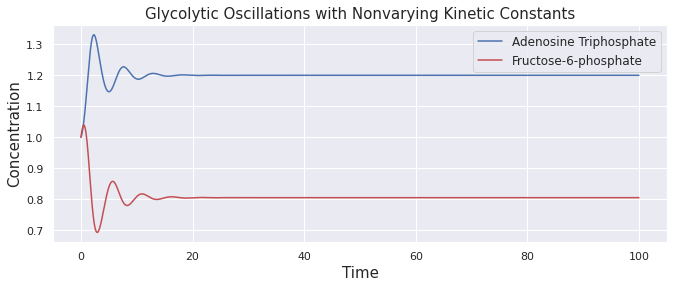

In [6]:
#x is for ATP
#y is for F6P
#The two ordinary differential equations
def fx(x,y,t): return (-x)+(a*y)+((x**2)*y)
def fy(x,y,t): return (b)-(a*y)-((x**2)*y)

#Constant values and time range
b=1.2
h=0.01
t=np.arange(0,100+h,h)

#Initializing
x=np.zeros(t.shape)
y=np.zeros(t.shape)
x[0]=1
y[0]=1

#RK4 run through
for i in range(len(t)-1):
    kx1=fx(x[i],y[i],t[i])
    ky1=fy(x[i],y[i],t[i])
    kx2=fx(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    ky2=fy(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    kx3=fx(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    ky3=fy(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    kx4=fx(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    ky4=fy(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    ky=(ky1+2*ky2+2*ky3+ky4)/6

    x[i+1]=x[i]+h*kx
    y[i+1]=y[i]+h*ky

#Graphing as two seperate lines
plt.figure(figsize=(11,4))
plt.plot(t,x,'b',label='Adenosine Triphosphate')
plt.plot(t,y,'r',label='Fructose-6-phosphate')
plt.ylabel('Concentration',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.title('Glycolytic Oscillations with Nonvarying Kinetic Constants',fontsize=15)
plt.legend(fontsize=12)
plt.show()

#Steady-state equilibrium is independent of inital conditions as long as values create a solution that exists at all points, which will be all initial values for an analytical solution.
#In this case it is dependent on error size.

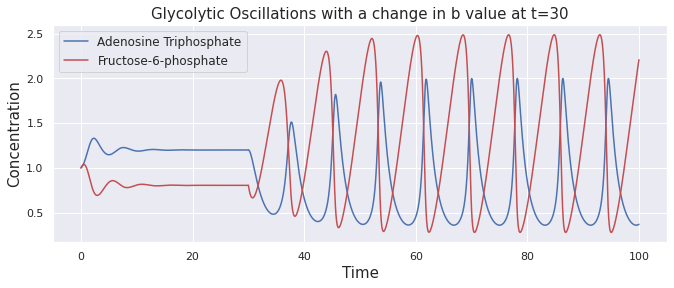

In [7]:
#RK4 for the differential equations for t=0 to t=30 with b=1.2. Initialized with constants.
b=1.2
def fx(x,y,t): return (-x)+(a*y)+((x**2)*y)
def fy(x,y,t): return (b)-(a*y)-((x**2)*y)
h=0.01
t=np.arange(0,30+h,h)
x=np.zeros(t.shape)
y=np.zeros(t.shape)
x[0]=1
y[0]=1
for i in range(len(t)-1):
    kx1=fx(x[i],y[i],t[i])
    ky1=fy(x[i],y[i],t[i])
    kx2=fx(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    ky2=fy(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    kx3=fx(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    ky3=fy(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    kx4=fx(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    ky4=fy(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    ky=(ky1+2*ky2+2*ky3+ky4)/6
    x[i+1]=x[i]+h*kx
    y[i+1]=y[i]+h*ky

#RK4 for the differential equations for t=30 to t=100 with b=0.8. Initialized with the final values from the first set of data
b1=0.8
def fx1(x,y,t): return (-x)+(a*y)+((x**2)*y)
def fy1(x,y,t): return (b1)-(a*y)-((x**2)*y)
h1=0.01
t1=np.arange(30,100+h1,h1)
x1=np.zeros(t1.shape)
y1=np.zeros(t1.shape)
x1[0]=x[3000]                                         
y1[0]=y[3000]
for i in range(len(t1)-1):
    kx11=fx1(x1[i],y1[i],t1[i])
    ky11=fy1(x1[i],y1[i],t1[i])
    kx21=fx1(x1[i]+h1*kx11/2,y1[i]+h1*ky11/2,t1[i]+h1/2)
    ky21=fy1(x1[i]+h1*kx11/2,y1[i]+h1*ky11/2,t1[i]+h1/2)
    kx31=fx1(x1[i]+h1*kx21/2,y1[i]+h1*ky21/2,t1[i]+h1/2)
    ky31=fy1(x1[i]+h1*kx21/2,y1[i]+h1*ky21/2,t1[i]+h1/2)
    kx41=fx1(x1[i]+h1*kx31,y1[i]+h1*ky31,t1[i]+h1)
    ky41=fy1(x1[i]+h1*kx31,y1[i]+h1*ky31,t1[i]+h1)
    kxx=(kx11+2*kx21+2*kx31+kx41)/6
    kyy=(ky11+2*ky21+2*ky31+ky41)/6
    x1[i+1]=x1[i]+h1*kxx
    y1[i+1]=y1[i]+h1*kyy

#Graph them together to get a continuous function that changes b value at t=30
plt.figure(figsize=(11,4))
plt.plot(t,x,'b',label='Adenosine Triphosphate')
plt.plot(t,y,'r',label='Fructose-6-phosphate')
plt.plot(t1,x1,'b')
plt.plot(t1,y1,'r')
plt.ylabel('Concentration',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.title('Glycolytic Oscillations with a change in b value at t=30',fontsize=15)
plt.legend(fontsize=12)
plt.show()

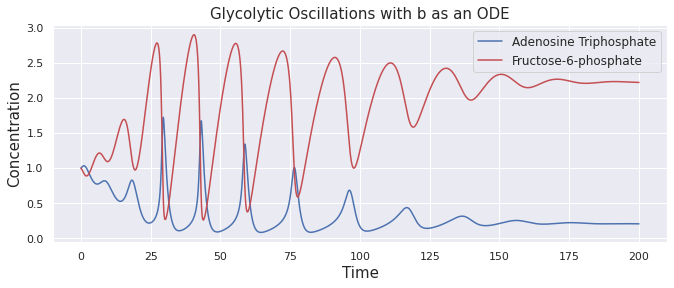

In [8]:
#Function with list for dA/dt, dF/dt, and db/dt
def F(Y,t): return [(-Y[0]+(a*Y[1])+((Y[0]**2)*Y[1])),(Y[2])-(a*Y[1])-((Y[0]**2)*Y[1]),-0.1*Y[1]*Y[0]*np.exp(-1/Y[2])]

#Time range
h=0.01
t=np.arange(0,200+h,h)

#Initial values as list
Y0=[1,1,1]

#Imported differential function
Y=sid.odeint(F,Y0,t)

#Graph only ATP and F6P
plt.figure(figsize=(11,4))
plt.plot(t,Y[:,0],'b',label='Adenosine Triphosphate')
plt.plot(t,Y[:,1],'r',label='Fructose-6-phosphate')
plt.ylabel('Concentration',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.title('Glycolytic Oscillations with b as an ODE',fontsize=15)
plt.legend(fontsize=12)
plt.show()